In [1]:
import FinanceDataReader as web

from datetime import date, timedelta

import matplotlib.pyplot as plt

import datetime

import numpy as np

In [4]:
%matplotlib inline 
# 파이썬 코드가 아니고 주피터랩에서만 인식하는 특수문자 (%~) : 그래프를 안에서 띄워달라고 함

plt.figure(figsize=(15,9))

# today = date.today()

startday = date(2021,4,1)

endday = date(2021,5,14)

KAKAO = web.DataReader("035720", startday, endday)

KAKAO

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-04-01,100357,101159,98751,100157,412423,0.002011
2021-04-02,101964,101964,100157,100559,298641,0.004014
2021-04-05,100959,101360,100357,100759,310400,0.001989
2021-04-06,101561,109389,101361,109189,1724958,0.083665
2021-04-07,109188,109188,105576,108788,820896,-0.003673
2021-04-08,108185,112600,107181,109992,912514,0.011067
2021-04-09,111197,112602,110594,112000,788839,0.018256
2021-04-12,0,0,0,112000,0,0.000000
2021-04-13,0,0,0,112000,0,0.000000


<Figure size 1080x648 with 0 Axes>

In [6]:
KAKAO = KAKAO[KAKAO['Volume'] != 0]

# SEC['Close'].head()
KAKAO

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-04-01,100357,101159,98751,100157,412423,0.002011
2021-04-02,101964,101964,100157,100559,298641,0.004014
2021-04-05,100959,101360,100357,100759,310400,0.001989
2021-04-06,101561,109389,101361,109189,1724958,0.083665
2021-04-07,109188,109188,105576,108788,820896,-0.003673
2021-04-08,108185,112600,107181,109992,912514,0.011067
2021-04-09,111197,112602,110594,112000,788839,0.018256
2021-04-15,120500,132500,118000,120500,17115015,0.075893
2021-04-16,115500,120500,115500,119000,13709555,-0.012448


In [7]:
# 1 씩 shift

KAKAO['Close'].shift(1).head()

Date
2021-04-01         NaN
2021-04-02    100157.0
2021-04-05    100559.0
2021-04-06    100759.0
2021-04-07    109189.0
Name: Close, dtype: float64

In [9]:
# 일반 수익률 계산 (일반 수익률 = (미래가격 – 이전가격) / 이전가격 )
# shift(-1)은 위로 감 / shift(1)은 아래로 이동

KAKAO['Rate'] = (KAKAO['Close'].astype(float)-KAKAO['Close'].shift(1).astype(float)) / KAKAO['Close'].shift(1).astype(float)

KAKAO

,Open,High,Low,Close,Volume,Change,Rate
Date,,,,,,,
2021-04-01,100357,101159,98751,100157,412423,0.002011,NaN
2021-04-02,101964,101964,100157,100559,298641,0.004014,0.004014
2021-04-05,100959,101360,100357,100759,310400,0.001989,0.001989
2021-04-06,101561,109389,101361,109189,1724958,0.083665,0.083665
2021-04-07,109188,109188,105576,108788,820896,-0.003673,-0.003673
2021-04-08,108185,112600,107181,109992,912514,0.011067,0.011067
2021-04-09,111197,112602,110594,112000,788839,0.018256,0.018256
2021-04-15,120500,132500,118000,120500,17115015,0.075893,0.075893
2021-04-16,115500,120500,115500,119000,13709555,-0.012448,-0.012448


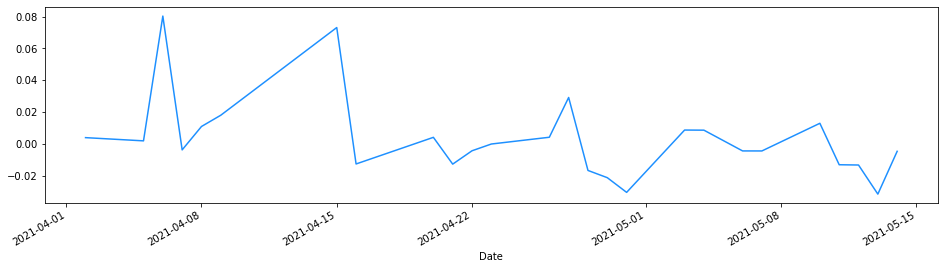

In [15]:
KAKAO["Rate"].plot(figsize=(16,4), color='dodgerblue')

plt.show()